## Import libraries

In [25]:
import re
import nltk
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from keras.models import model_from_json
import pickle

## Load Data

In [13]:
df = pd.read_csv('../Data/Combined_News_DJIA.csv')
df = df[:1]

## Load Model

## Preprocessing

### Raw text

In [14]:
headlines = []
for row in range(0,len(df.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[row,2:27]))
string  = ''.join(headlines)
string

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

### Clean Text 

In [15]:
string = string.lower()
string  = re.sub(r'[^\w\s]', ' ', string) # remove punctuation
string = ' '.join([w for w in string.split() if len(w) >= 3])
string

'georgia downs two russian warplanes countries move brink war breaking musharraf impeached russia today columns troops roll into south ossetia footage from fighting youtube russian tanks are moving towards the capital south ossetia which has reportedly been completely destroyed georgian artillery fire afghan children raped with impunity official says this sick three year old was raped and they nothing 150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets breaking georgia invades south ossetia russia warned would intervene side the enemy combatent trials are nothing but sham salim haman has been sentenced years but will kept longer anyway just because they feel like georgian troops retreat from osettain capital presumably leaving several hundred people killed video did the prep georgia for war with russia rice gives green light for israel attack iran says has veto over israeli military ops announcing class action lawsuit behalf american public against 

### Headline Visulizaiton

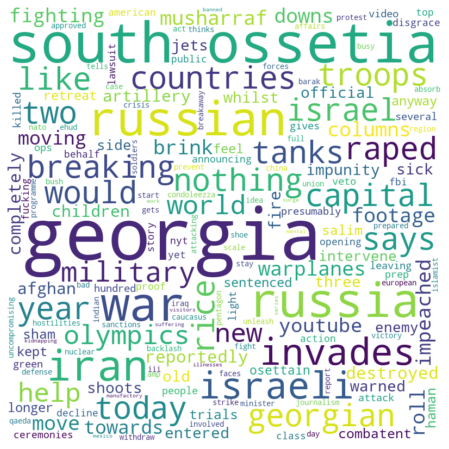

In [16]:
stop1 = stopwords.words("english")
stop  = stop1
stop_words = set(stop)
wordcloud =WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(string)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Word Embedding

### Load TFIDF Model

In [28]:
tf1.

<1611x401 sparse matrix of type '<class 'numpy.float64'>'
	with 48258 stored elements in Compressed Sparse Row format>

In [30]:
# Testing phase
tf1 = pickle.load(open("../Model/tfidf1.pkl", 'rb'))
advancedvectorizer = TfidfVectorizer( min_df=0.04, max_df=0.3, max_features = 200000, ngram_range = (2, 2),vocabulary = tf1.vocabulary_)

# # Create new tfidfVectorizer with old vocabulary
# tf1_new = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words = "english", lowercase = True,
#                           max_features = 500000, vocabulary = tf1.vocabulary_)
X_tf1 = advancedvectorizer.fit_transform([string])

In [20]:
[string]

['georgia downs two russian warplanes countries move brink war breaking musharraf impeached russia today columns troops roll into south ossetia footage from fighting youtube russian tanks are moving towards the capital south ossetia which has reportedly been completely destroyed georgian artillery fire afghan children raped with impunity official says this sick three year old was raped and they nothing 150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets breaking georgia invades south ossetia russia warned would intervene side the enemy combatent trials are nothing but sham salim haman has been sentenced years but will kept longer anyway just because they feel like georgian troops retreat from osettain capital presumably leaving several hundred people killed video did the prep georgia for war with russia rice gives green light for israel attack iran says has veto over israeli military ops announcing class action lawsuit behalf american public against

In [31]:
# # batch_size = 32
# # nb_classes = 2
# advancedvectorizer = TfidfVectorizer(min_df=0.04, max_df=1, max_features = 200000, ngram_range = (2, 2))
# advancedtest = advancedvectorizer.fit_transform([string])
# # testheadlines = []
# # for row in range(0,len(test.index)):
# #     testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
# # advancedtest = advancedvectorizer.transform(testheadlines)
# # print(advancedtrain.shape)

# # X_train = advancedtrain.toarray()
X_test = X_tf1.toarray()

In [ ]:
batch_size = 32
nb_classes = 2
advancedvectorizer = TfidfVectorizer( min_df=0.04, max_df=0.3, max_features = 200000, ngram_range = (2, 2))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
print(advancedtrain.shape)

X_train = advancedtrain.toarray()
X_test = advancedtest.toarray()

## Prediction

### Load Deep learning model

In [32]:
X_test

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37796447, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37796447, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37796447, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [33]:
json_file = open('../Model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../Model/model.h5")
print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


In [34]:
loaded_model.predict_classes(X_test, verbose=0)

array([1])